# < 1. 백본 네트워크 구조 상세분석 >

딥러닝 업계에서는 한 해에도 수천 편의 논문이 쏟아지고, 2년 전 논문이 금세 당연한 기술이 됩니다. 사실 우리가 배운 ResNet도 2015년 이미지넷 챌린지(ImageNet challenge)에서 공개되었던 네트워크로, 다른 분야에 비하면 기술이 굉장히 빠르게 보급된 것이라 볼 수 있지요. 따라서 딥러닝 공부를 계속하기 위해서는 새로 나오는 논문을 읽고, 최신 기법을 파악하는 것이 중요하다고 할 수 있습니다.

이번 시간에는 딥러닝 논문의 구조를 파악함과 동시에 대표적인 딥러닝 네트워크 구조를 소개하고자 합니다. 먼저 새로운 논문에 대한 부담감을 없애기 위해서 ResNet을 다시 보면서 딥러닝 논문의 구조를 간략히 살펴보고 친해지는 시간을 갖도록 하겠습니다. 이후에는 ResNet 이후의 다른 시도들(DenseNet, SENet)을 소개하고 네트워크의 구조를 최적화하는 NAS(Neural Architecture Search), EfficientNet에 대해서도 간략히 짚어 보겠습니다.

## 1.2 딥러닝 논문의 구조

ResNet 논문은 Residual Block이라는 아주 간단하면서도 획기적인 개념을 도입하여 딥러닝 모델의 레이어가 깊어져도 안정적으로 학습되면서 모델 성능 개선까지 가능함을 입증하였습니다. 이처럼 딥러닝 분야에서 사용되는 많은 기법들은 논문을 통해서 공개되는 경우가 많습니다.

그렇다면 논문에서는 ResNet의 잔차 학습을 어떤 과정으로 소개하고 효과를 증명할까요? 딥러닝도 컴퓨터 과학의 한 분야이기 때문에, 우리가 과학시간에 했던 것처럼 실험 으로 이 효과를 눈으로 보여줍니다. 중력에 의해 생기는 가속도가 9.81m/s^2 임을 직접 확인하기 위해서 이런 실험을 해봤던 것처럼 원한다면 원본 논문의 ResNet을 직접 구현해 실험해 보고 효과를 확인할 수 있습니다.
  
이렇게 논문이 제안하는 새로운 방식과 효과를 확인하기 위해서는 어느 정도 논문의 구조를 파악하고 이해할 수 있어야 합니다. 아래에서는 간략히 "논문"이라는 글의 구조를 파악해 보도록 하겠습니다.

### 논문의 형식적 구조

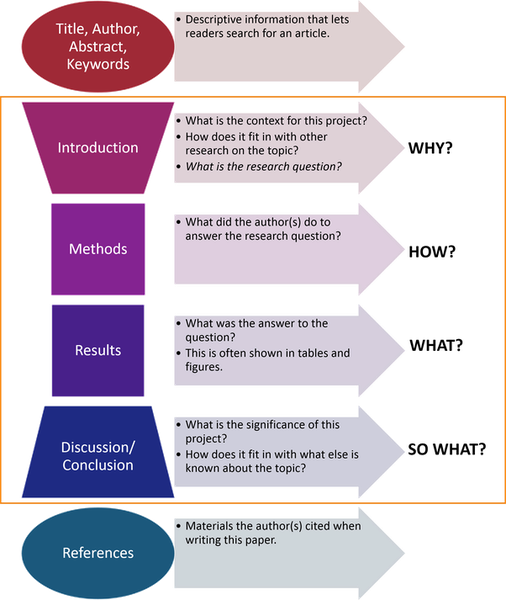

`초록(abstract)` 은 아이디어를 제안하는 방식과 학계에 이 논문이 기여하는 점을 요약합니다. 그 뒤로 논문의 주요 내용이 따라오는데요. 논문 내용은 일반적으로 `서론(introduction)` 과 `관련 연구(related work)` , 그리고 소제목의 표현방식에 따라 달라지지만 일반적으로 제안하는 방법에 관한 `이론 설명` 이 따라옵니다. 이렇게 제안하는 방법을 소개한 후 이 효과를 확인하기 위한 `실험(experiments)` 셋팅과 결과가 따라붙습니다. ResNet 논문에는 없지만 그 뒤로 결론(conclusion) 으로 연구 내용 요약과 추가적인 연구방향을 소개하기도 합니다.

논문의 내용이 끝나면 뒤로는 `참고문헌(reference)` 과 `부록(appendix)` 이 붙습니다. 참고문헌에서는 논문의 설명과 구현에 있어 인용한 논문들의 리스트가 소개되고 부록에서는 미처 본문에서 설명하지 못한 구현 또는 추가적인 실험 설명이 포함됩니다.

이러한 논문의 형식 속에 담고자 하는 논리 구조가 있습니다.

1) 이전까지의 연구가 해결하지 못했던 문제의식
2) 이 문제를 해결하기 위한 그동안의 다른 시도들
3) 이 문제에 대한 이 논문만의 독창적인 시도
4) 그러한 시도가 가져온 차별화된 성과

서론(Introduction)은 이러한 논리구조를 명확하게 정리하여 제시하는 가장 중요한 역할을 담당하고 있습니다. 이후 관련 연구(Related Work)는 주로 2)의 내용을, 논문의 본론과 실험(Experiments)가 3)의 내용을, Experiment에 포함된 실험 결과와 해석이 4)의 내용을 구체화하여 제시하는 역할을 합니다.

---

## 1.3 ResNet의 핵심개념과 그 효과

### 1) ResNet 논문의 문제의식

최초로 제기하는 질문은 딥러닝 모델의 레이어를 깊이 쌓으면 항상 성능이 좋아지는가 하는 것입니다. 그러나 이 질문이 문제의 핵심은 아닙니다. 레이어를 깊이 쌓았을 때 Vanishing/Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생기는데, 여기에 대해서는 이미 몇 가지 대응 방법이 알려져 있기 때문입니다.

가장 눈에 띄는 키워드는 바로 `Degradation Problem`이라는 표현입니다. 이것은 모델의 수렴을 방해하는 Vanishing/Exploding Gradient 문제와는 달리, 레이어를 깊이 쌓았을 때 모델이 수렴하고 있음에도 불구하고 발생하는 문제입니다.
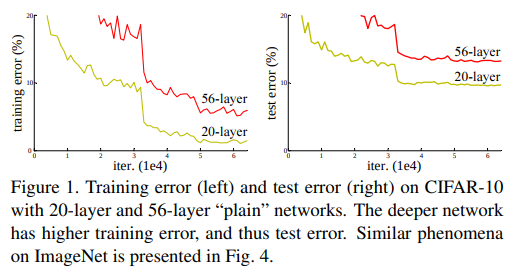

Degradation Problem : 딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생하는데, 이것은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제이다.

### 2) ResNet 논문이 제시한 솔루션 : Residual Block


ResNet은 깊은 네트워크의 학습이 어려운 점을 해결하기 위해서 레이어의 입력값을 활용하여 레이어가 "residual function"(잔차 함수)을 학습하도록 합니다.

단순히 말하자면 일종의 지름길("shortcut connection")을 통해서 레이어가 입력값을 직접 참조하도록 레이어를 변경했다고 보시면 됩니다. Shortcut connection은 앞에서 입력으로 들어온 값을 네트워크의 출력층에 곧바로 더해줍니다. 네트워크는 출력값에서 원본 입력을 제외한 잔차(residual) 함수를 학습하기 때문에 네트워크가 ResNet이라는 이름을 가지게 되었습니다.

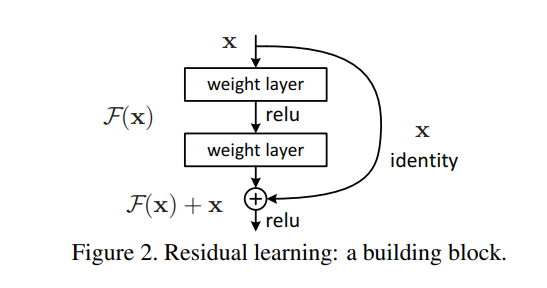



레이어를 많이 쌓았다고 해서 모델 성능이 떨어지는 것을 어떻게 설명해야 할까요? 저자들은 이 부분에 의문을 품었습니다. 만약 기존 모델에다가 identity mapping 레이어를 수십 장 덧붙인다고 해서 모델 성능이 떨어질 리는 없을 텐데, 그렇다면 레이어를 많이 쌓았을 때 이 레이어들은 오히려 identity mapping 레이어보다도 못하다는 뜻이 됩니다. 많이 겹쳐 쌓은 레이어가 제대로 학습이 이루어지지 않았다는 반증이 됩니다.

여기서 저자들이 기발한 생각을 합니다. 학습해야 할 레이어 H(x)를 F(x)+x로 만들면 어떨까? 여기서 x는 레이어의 입력값입니다. 그렇다면 설령 F(x)가 Vanishing Gradient현상으로 전혀 학습이 안되어 zero mapping이 될지라도, 최종 H(x)는 최소한 identity mapping이라도 될 테니 성능 저하는 발생하지 않게 된다는 것입니다. 그렇다면 실제로 학습해야 할 F(x)는 학습해야 할 레이어 H(x)에다 입력값 x를 뺀 형태, 즉 잔차(Residual)함수가 되는데, 이것은 H(x)를 직접 학습하는 것보다는 훨씬 학습이 쉽지 않겠냐는 것입니다. 레이어를 깊이 쌓을수록 Residual에 해당하는 F(x)는 0에 가까운 작은 값으로 수렴해도 충분하기 때문입니다. 그리고 실험해 보니 이 구조가 실제로도 안정적으로 학습이 되며, 레이어를 깊이 쌓을수록 성능이 향상되는 것이 확인되었기 때문입니다.

정리하자면, Residual 레이어를 F(x)로 표현하면 이 레이어의 결과는 입력값 x에 대해 F(x)가 됩니다. 여기에 레이어의 입력값 x을 더해주면 최종 출력값은 F(x)+x, 즉 우리가 보통 생각하는 레이어의 결괏값이 되겠지요. 이후 이 값은 ReLU 활성함수(activation function)을 거치게 됩니다. 위 식에서 F(x, W_i) 는 학습되어야 할 residual mapping으로서 잔차 학습(residual learning)은 이 식을 학습합니다. ResNet에서는 shortcut connection을 가진 ResNet의 기본 블록을 Residual Block이라고 부릅니다. ResNet은 이러한 Residual Block 여러 개로 이루어집니다.

### 3) Experiments


ResNet에 추가된 shortcut connection의 아이디어를 검증하려면 어떤 실험을 해야 할까요? 당연히 shortcut connection이 없는 네트워크와 이를 사용한 네트워크를 가지고 성능을 비교해 봐야 할 것입니다.

실제 논문에서는 네트워크가 깊어짐에 따라 발생하는 경사소실(vanishing gradient) 문제를 ResNet이 해결함을 보여주기 위해서, shortcut connection의 유무와 네트워크 깊이에 따라 경우를 나누어 모델을 구현합니다. 18개 층과 34개 층을 갖는 네트워크를, 각각 shortcut이 없는 일반 네트워크(plain network)와 shortcut이 있는 ResNet 두 가지로 구현해 총 4가지를 만든 것이지요. 이후 이미지넷(ImageNet) 데이터를 사용해 각 모델을 훈련을 시킨 뒤 효과를 분석합니다.

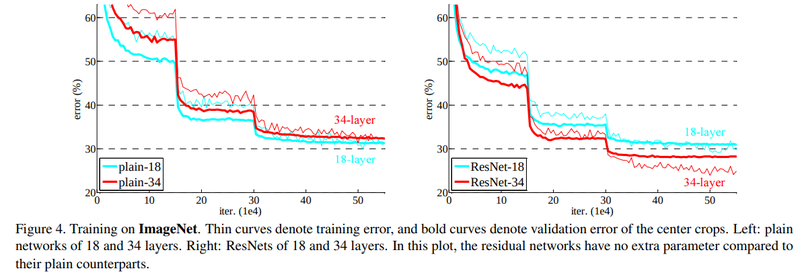

위 그림에서 왼쪽은 일반 네트워크 두 개로 네트워크가 깊어지더라도 학습이 잘되지 않는 것을 볼 수 있습니다. 34개 층을 갖는 네트워크가 18개 층을 갖는 네트워크보다 오류율(error rate)이 높지요. 하지만 shortcut이 적용된 오른쪽에서는 레이어가 깊어져도 학습이 잘 되는 효과를 볼 수 있습니다. 그렇다면 이렇게 학습된 모델은 검증 데이터셋(vallidation dataset)에서 어떻게 차이가 날까요?

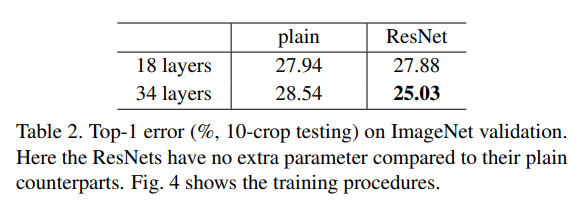

Top-1 error란 모델이 가장 높은 확률 값으로 예측한 class 1개가 정답과 일치하는지 보는 경우의 오류율입니다. Top-5는 모델이 예측한 값들 중 가장 높은 확률 값부터 순서대로 5개 class 중 정답이 있는지를 보는 것이지요. 이 숫자는 당연히 낮을수록 좋습니다.

일반 네트워크("plain")는 레이어가 16개나 늘어나 네트워크가 깊어졌는데도 오류율은 오히려 높아졌습니다. 경사소실로 인해 훈련이 잘되지 않았기 때문입니다. ResNet에서는 잘 훈련된 레이어가 16개가 늘어난 효과로 오류율이 2.85% 감소했습니다. 논문에서는 이렇게 간단한 실험으로 Residual Block의 효과를 입증하고 있습니다.

---

## 1.4 ResNet 이후 시도 (1) Connection을 촘촘히

Densely Connected Convolutional Networks의 저자들은 DenseNet은 ResNet의 shortcut connection을 마치 Fully Connected Layer처럼 촘촘히 가지도록 한다면 더욱 성능 개선 효과가 클 것이라고 생각하고 이를 실험으로 입증해 보였습니다.

### 1) Dense Connectivity

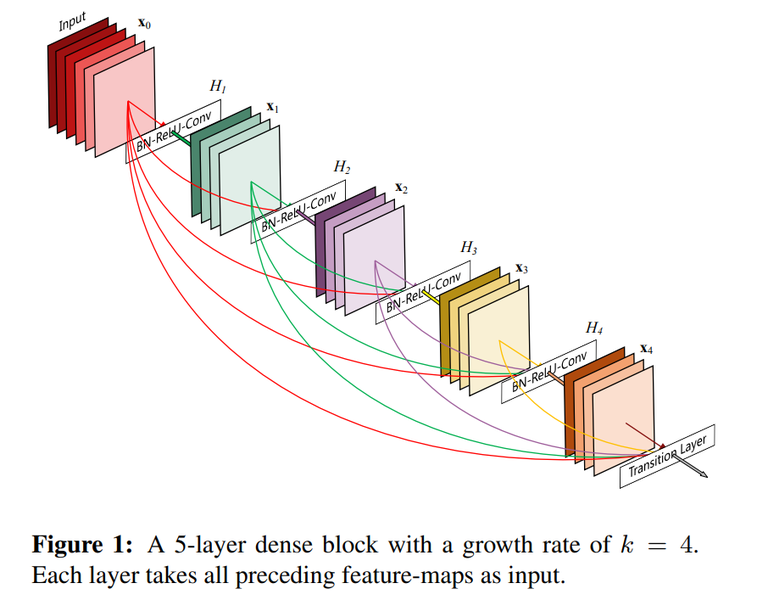

일반적인 컨볼루션 네트워크가 LL개의 레이어에 대해 각 레이어 간 하나씩의 연결, 즉 총 L개의 연결을 갖는 것과는 달리, DenseNet의 기본 블록은 L 개의 레이어가 있을 때 레이어 간 L(L+1)/2 개의 직접적인 연결(direct connection)을 만듭니다. 이러한 연결 구조를 "dense connectivity" 라고 부르며, 아래처럼 H_l로 표기하고 이를 합성함수(composite function)라고 부릅니다.

각 레이어는 이전 레이어들에서 나온 특성 맵(feature map) 전부를 입력값으로 받습니다.

Shortcut connection이 있어 ResNet과 비슷해 보일 수 있지만 ResNet은 shortcut을 원소별로 단순히 더해주었던 반면, DenseNet은 하나하나를 차원으로 쌓아서(concatenate) 하나의 텐서로 만들어 낸다는 사실이 다릅니다. 또 이전 ResNet의 connection에 다른 연산이 없었던 것과 달리, 합성함수 H_l은 이 텐서에 대해 배치 정규화(batch normalization, BN), ReLU 활성화 함수, 그리고 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행합니다.

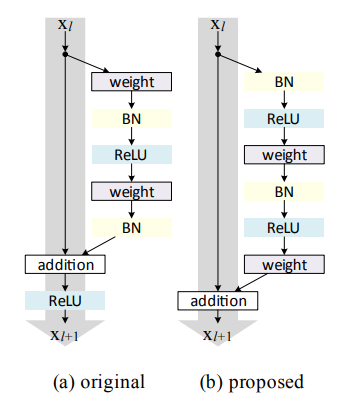
Pre-activation 개념은 Identity Mappings in Deep Residual Networks 논문에서 제시되었는데요, 위 그림의 (b)에서 보듯 ReLU가 컨볼루션 블록 안으로 들어간 것을 의미합니다. 어떤 역할을 하는지에 대해서는 아래 자료를 참고합시다
https://deep-learning-study.tistory.com/510


### 2) Growth Rate

특성 맵을 더해주던 ResNet과 달리 DenseNet에서는 특성 맵을 채널 방향으로 쌓아서 사용합니다. 그렇다면 4개의 채널을 가진 CNN 레이어 4개를 DenseNet 블록으로 만들었을 때, 입력값의 채널 개수가 4인 경우 블록 내 각 레이어의 입력값은 몇 개 채널을 가지게 될까요?

첫 번째 레이어 입력값의 채널은 입력 데이터의 채널 그대로 4입니다. 두 번째 레이어의 입력값은 입력 데이터의 채널 값과, 첫 번째 레이어 출력값의 채널인 4을 더해 8이 됩니다. 그리고 세 번째 레이어는 입력 데이터의 채널 4와 첫 번째 레이어 출력값의 채널 4, 그리고 두 번째 레이어 출력값의 채널 4를 받아 12개의 특성 맵을 입력받고, 네 번째 레이어는 같은 방식으로 16개의 특성 맵을 입력받습니다.

입력값의 채널이 4로 시작했으나 진행할수록 특성 맵의 크기가 매우 커지는 것을 볼 수 있습니다. 이를 제한하기 위해서 논문에서는 growth rate이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 개수를 조절합니다.

위에서 CNN의 채널 수를 4로 정하였는데 이 값이 growth rate이라고 할 수 있습니다. 블록 내의 채널 개수를 작게 가져가면서 최종 출력값의 특성 맵 크기를 조정할 수 있도록 했다고 합니다. 이외에도 여러 방식이 적용되었으니 DenseNet Tutorial 1 Paper Review & Implementation details 에서 bottleneck 레이어, transition 레이어, composite function 등에 대해 살펴보고 넘어가시기 바랍니다.

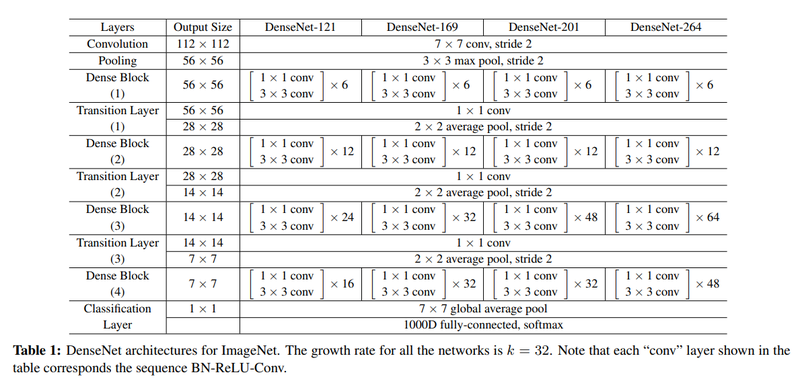

---

## 1.5 ResNet 이후 시도 (2) 어떤 특성이 중요할까?

네트워크 구조를 연달아 다루어 조금 질리실 수 있을 것 같습니다. 이제 마지막 네트워크, `SENet` 을 살펴보겠습니다. SENet은 Squeeze-and-Excitation Networks의 줄임말인데요. 어떤 것을 "squeeze and excite" 한다는 것일까요?

일반적인 CNN은 입력에 대해서 컨볼루션 필터를 필터 사이즈(filter size)에 따라 적용합니다. 이때 필터의 개수가 곧 컨볼루션 레이어 출력값의 채널 개수가 됩니다. SqueezeNet에서는 이때 채널 방향으로 global average pooling을 적용, 압축된 정보를 활용하여 중요한 채널이 활성화되도록 합니다. 어떻게 보면 CNN에서 나온 특성 맵의 채널에 어텐션(attention) 매커니즘을 적용한 블록을 만들어냈다고 볼 수 있습니다. 이런 SENet은 2017 ILSVRC 분류 문제(classification task)에서 1등을 하게 됩니다.



### 1) Squeeze


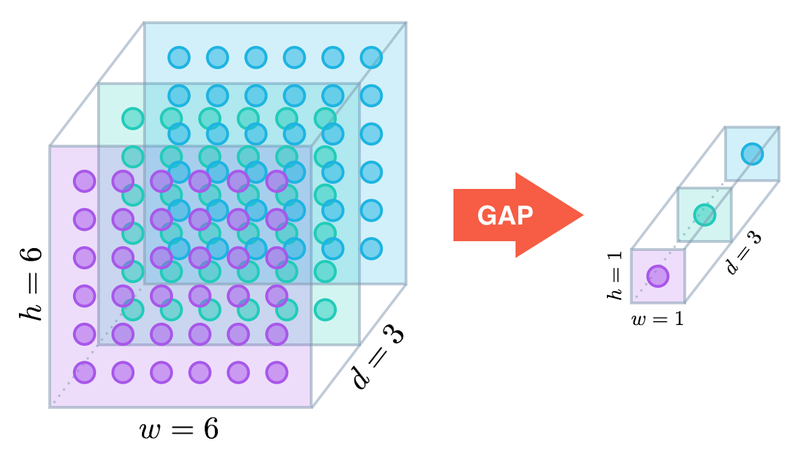

Squeeze 는 말 그대로 특성에서 중요한 정보를 짜내는 과정입니다. 특성 맵의 채널에서 어느 채널이 중요한지 정보를 만들기 위해서는 우선 채널에 따른 정보를 압축해서 가져와야 하겠지요.

어떻게 채널별 정보를 압축할 수 있을까요? 일반 CNN에서도 많이 사용하듯, 풀링(pooling) 기법을 사용하면 됩니다. 풀링은 보통 커널(kernel) 영역의 정보를 압축하는 데 사용하지요. 커널 영역에 대해 최댓값만 남기는 것이 Max Pooling, 평균값을 남기는 것이 Average Pooling이었습니다.



### 2) Excitate

채널별 정보를 짜내는 데 성공했습니다. 이제 채널별 정보에 따라 어떤 채널을 강조해야 할지 판단하면 됩니다.

채널을 강조하는 것을 논문에서는 "excitation"으로 표현하며, 수식은 다음과 같습니다. 이전에 봤던 전체 네트워크 그림의 $F_{ex}$식이지요.

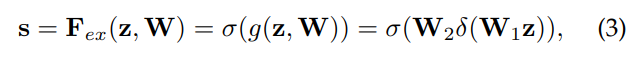

- z 는 위에서 global average pooling을 적용한 특성, 즉 "squeeze" 활동의 결과물입니다.
- 이 특성에 W_1을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 \deltaδ 를 거칩니다.
- 이후 두 번째 W_2를 곱해주는 linear layer를 거치고 마지막으로 시그모이드 활성화 함수 \sigmaσ을 거칩니다.

이때 시그모이드를 사용하는 이유는 가장 중요한 하나의 채널만 활성화되는 것이 아닌, 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함입니다. 데이터셋에 정답 라벨이 하나뿐인 단순 분류 모델의 활성화 함수로는 소프트맥스(SoftMax)를 사용해서 단 하나의 최댓값을 찾지만, 하나의 대상에도 여러 개의 클래스의 정답 라벨을 지정할 수 있는 다중 라벨 분류(multi label classification)에서는 시그모이드를 사용하는 것과 같은 방식입니다.

---

## 1.6 모델 최적화하기 (1) Neural Architecture Search

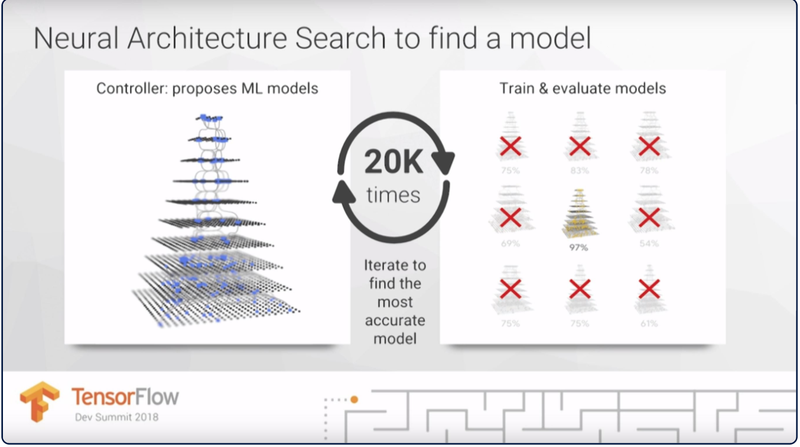

지금까지 봤던 방법은 사람이 고안한 방식을 네트워크 구조에 적용하여 효과를 봤던 방법입니다. 모델의 훈련은 컴퓨터가 시켜줄 수 있어도, 어떤 모델 구조가 좋을지는 사람이 직접 고민하고 실험해 보아야 했죠. 이렇게 새로운 모델 구조를 고안하고 이해하는 과정을 반복하다 보면, "우리가 딥러닝으로 이미지 분류 문제를 풀기 위해 딥러닝 모델의 파라미터(parameter)를 최적화해 왔듯이 모델의 구조 자체도 최적화할 수는 없을지" 생각하게 됩니다. 이렇게 여러 가지 네트워크 구조를 탐색하는 것을 아키텍쳐 탐색(architecture search)라고 합니다. 그리고 그중 신경망을 사용해 모델의 구조를 탐색하는 접근 방법을 `NAS(neural architecture search)` 라고 합니다.

NASNet은 NAS에 강화학습을 적용하여 500개의 GPU로 최적화한 CNN 모델들인데요. 직접 모델 탐색을 할 환경을 구축하지 않더라도 텐서플로우에서 이미지넷 2012년 데이터셋에 최적화된 구조의 pre-trained NASNet 모델을 쉽게 사용할 수 있습니다 (참고). 그렇다면 NasNet은 어떤 방법으로 만들어졌는지 대략적으로 살펴보도록 합시다.

### 1) NASNet

NASNet과 같이 거창한 방법이 아니더라도, 일반적으로 머신 러닝에서는 그리드 탐색(grid search) 등으로 실험과 모델 셋팅(config)를 비교하기 위한 자동화된 방법을 사용하곤 합니다. 그리드 탐색은 간단히 말하면 모든 조합을 실험해보는 것입니다. 그러나 그리드 탐색과 같은 방법으로 접근할 경우 모델에서 바꿔볼 수 있는 구성의 종류가 매우 많아 머신 러닝 중에서도 학습이 오래 걸리는 딥러닝에서는 적합하지 않습니다.

딥러닝에서 모델을 탐색하기 위해 강화학습 모델이 대상 신경망의 구성(하이퍼파라미터)을 조정하면서 최적의 성능을 내도록 하는 방법이 제안되었으며, NASNet은 그중 하나입니다. 아키텍쳐 탐색을 하는 동안 강화학습 모델은 대상 신경망의 구성을 일종의 변수로 조정하면서 최적의 성능을 내도록 합니다. 우리가 지금까지 보아왔던 레이어의 세부 구성, CNN의 필터 크기, 채널의 개수, connection 등이 조정할 수 있는 변수가 됩니다. 이렇게 네트워크 구성에 대한 요소들을 조합할 수 있는 범위를 탐색 공간(search space)이라고 합니다. 이 공간에서 최고의 성능을 낼 수 있는 요소의 조합을 찾는 것이지요.

NASNet이 NAS를 처음 적용한 것은 아니며 이전에도 논문들이 있었습니다. 이전의 방식들은 우리가 많이 접해왔던 MNIST에 최적화하는데 800개의 GPU를 사용해서 28일이 걸렸다고 합니다. 그렇게 나온 구조가 아래의 그림입니다

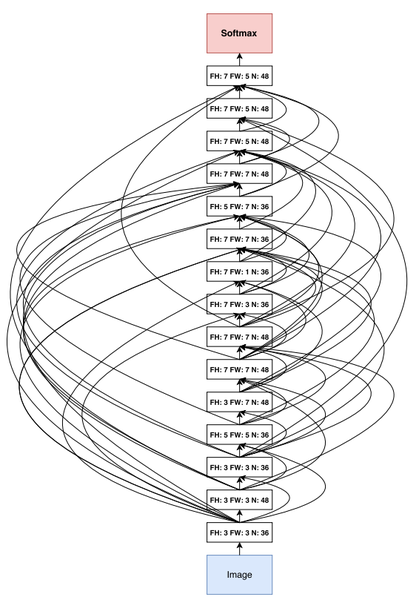

### 2) Convolution cell

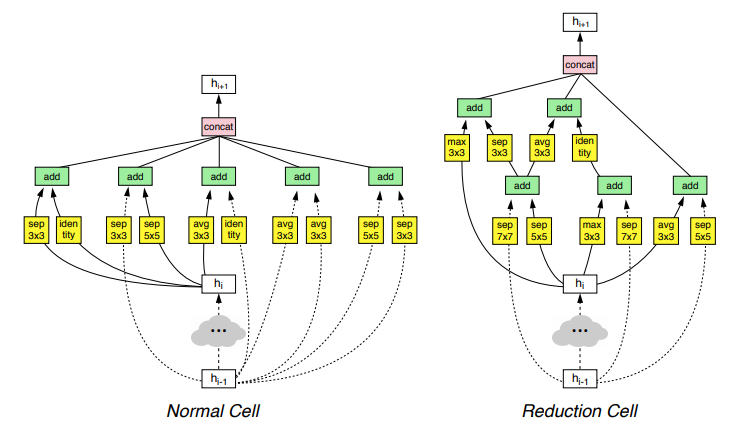

레이어 하나마다의 하이퍼 파라미터를 조절한다면 탐색 공간이 무지막지 방대해질 겁니다. 탐색 공간이 넓다는 말은 찾아야 할 영역이 넓다는 의미이고 넓은 곳에서 최적의 포인트를 찾는 데는 당연히 더 오랜 시간이 걸리겠죠. NASNet 논문에서는 이러한 탐색 공간을 줄이기 위해서 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식을 채택합니다.

ResNet에는 Residual Block, DenseNet에는 Dense Block이라는 모듈이 사용되는데, 논문에서는 이와 유사한 개념을 convolution cell이라고 부릅니다. Convolution cell은 normal cell과 reduction cell로 구분됩니다. Normal cell은 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정합니다. Reduction cell은 stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록 합니다. 논문의 모델은 normal cell과 reduction cell 내부만을 최적화하며, 이렇게 만들어진 convolution cell이 위 그림의 두 가지입니다. 두 가지 cell을 조합해 것이 최종 결과 네트워크(NASNet)를 만들었으며, 좀 더 적은 연산과 가중치로 SOTA(state-of-the-art) 성능을 기록했다고 하네요.

---

## 1.7 모델 최적화하기 (2) EfficientNet

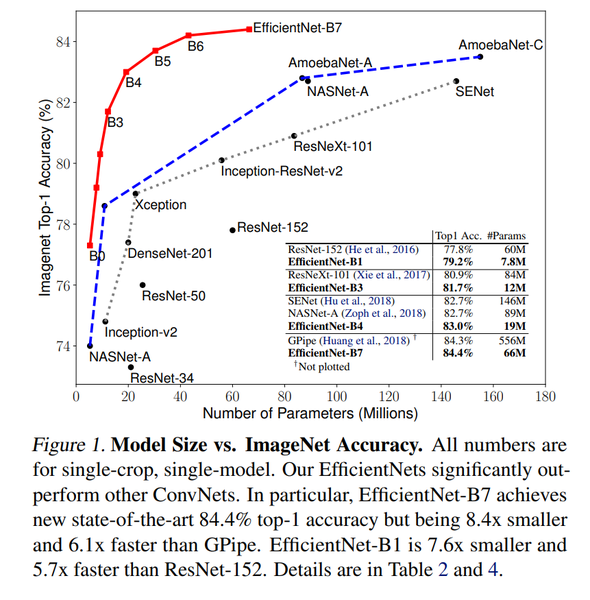

이번에 살펴볼 접근 방법은 2019년 발표된 EfficientNet입니다. EfficientNet의 강력함은 위의 그래프로 한눈에 볼 수 있습니다. 기존 모델들의 오류율을 뛰어넘을 뿐만 아니라 모델의 크기인 "Number of Parameters" 또한 최적화된 것을 볼 수 있습니다. 빨간색 선이 EfficientNet의 모델들이고 그 아래로 각 점에 따라서 이전에 봐왔던 모델들이 있는 것을 볼 수 있습니다. 정확도를 얻는 데 다른 네트워크들은 무지막지한 파라미터의 수를 사용한 반면 EfficientNet은 작고 효율적인 네트워크를 사용했다고 볼 수 있습니다.

EfficientNet은 우리가 이미지에 주로 사용하는 CNN을 효율적으로 사용할 수 있도록 네트워크의 형태를 조정할 수 있는 `width`, `depth`, `resolution` 세 가지 요소에 집중합니다. 여기서 width는 CNN의 채널에 해당합니다. 채널을 늘려줄수록 CNN의 파라미터와 특성을 표현하는 차원의 크기를 키울 수 있습니다. depth는 네트워크의 깊이입니다. ResNet은 대표적으로 네트워크를 더 깊게 만들 수 있도록 설계해 성능을 올린 예시입니다. 마지막으로 resolution은 입력값의 너비(w)와 높이(h) 크기입니다. 입력이 클수록 정보가 많아져 성능이 올라갈 여지가 생기지만 레이어 사이의 특성 맵이 커지는 단점이 있습니다.


### Compound scaling
EfficientNet은 앞서 말한 resolution, depth, width를 최적으로 조정하기 위해서 앞선 NAS와 유사한 방법을 사용해 기본 모델(baseline network)의 구조를 미리 찾고 고정해둡니다. 모델의 구조가 고정이 되면 효율적인 모델을 찾는다는 커다란 문제가, 개별 레이어의 resolution, depth, width 를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화됩니다.

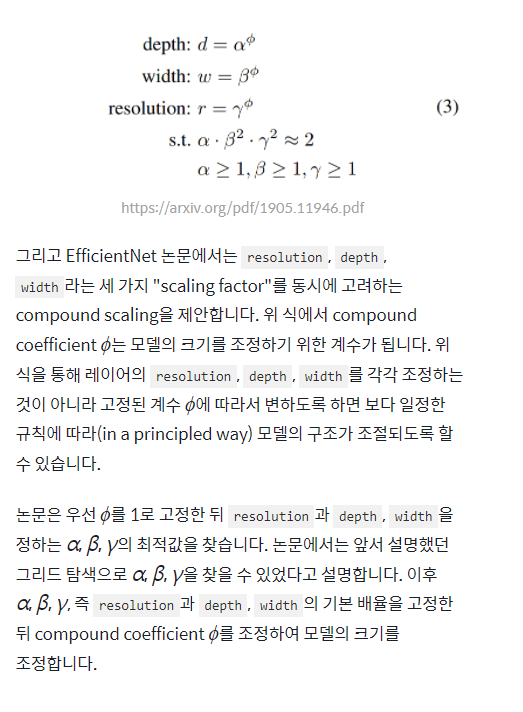

---